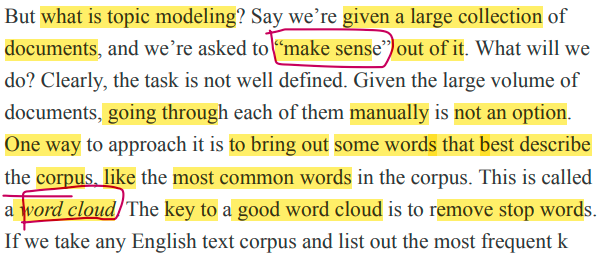

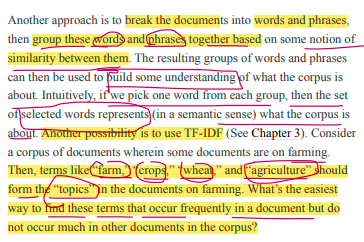  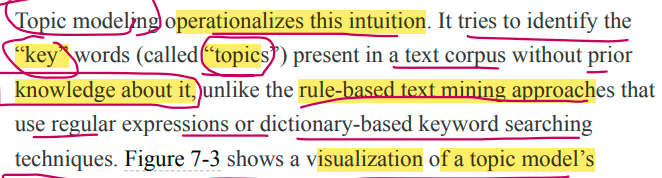

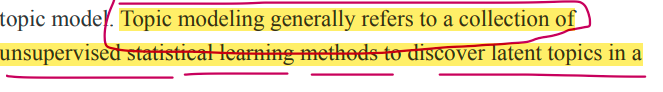

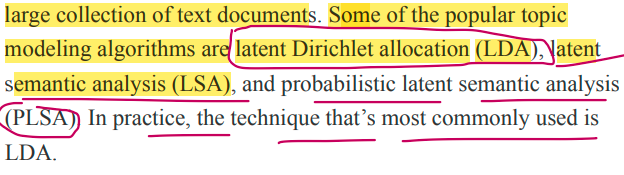

# <span style="color:yellow">Latent Dirichlet Allocation {LDA}</span>

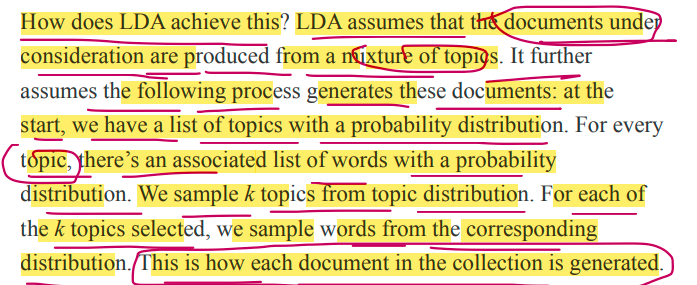

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def preprocess(textstring):
   stops =  set(stopwords.words('english'))
   tokens = word_tokenize(textstring)
   return [token.lower() for token in tokens if token.isalpha() and token not in stops]

In [ ]:
data_path = ""
summaries = []
for line in open(data_path, encoding="utf-8"):
   temp = line.split("\t")
   summaries.append(preprocess(temp[6]))

In [ ]:
dictionary = Dictionary(summaries)


dictionary.filter_extremes(no_below=10, no_above=0.5)
corpus = [dictionary.doc2bow(summary) for summary in summaries]

In [ ]:
temp = dictionary[0] 
id2word = dictionary.id2token


model = LdaModel(corpus=corpus, id2word=id2word,iterations=400, num_topics=10)
top_topics = list(model.top_topics(corpus))
pprint(top_topics)

In [ ]:
for idx in range(10):
    print("Topic #%s:" % idx, model.print_topic(idx, 10))
print("=" * 20)

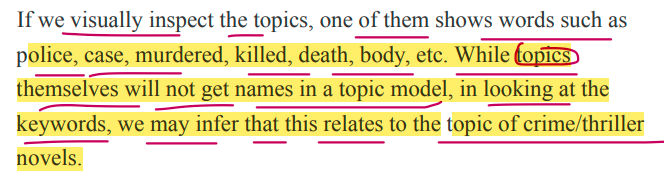

In [ ]:
from gensim.models import LsiModel
lsamodel = LsiModel(corpus, num_topics=10, id2word = id2word)  # train model

pprint(lsamodel.print_topics(num_topics=10, num_words=10))

In [ ]:
for idx in range(10):
    print("Topic #%s:" % idx, lsamodel.print_topic(idx, 10))
 
print("=" * 20)

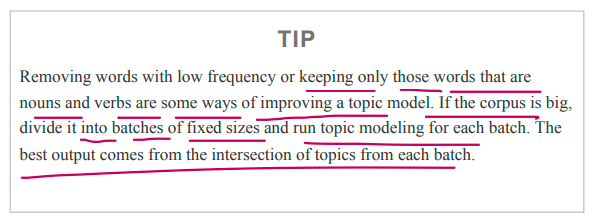

# Summarization

In [ ]:
!pip install sumy
!pip install lxml_html_clean
!pip3 install gensim==3.6.0
!pip install python-docx


In [9]:
from sumy.parsers.html import HtmlParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
url = "https://en.wikipedia.org/wiki/Automatic_summarization"
parser = HtmlParser.from_url(url, Tokenizer("english"))
summarizer = TextRankSummarizer()
for sentence in summarizer(parser.document, 5):
    print(sentence)

For text, extraction is analogous to the process of skimming, where the summary (if available), headings and subheadings, figures, the first and last paragraphs of a section, and optionally the first and last sentences in a paragraph are read before one chooses to read the entire document in detail.
Instead of trying to learn explicit features that characterize keyphrases, the TextRank algorithm[16] exploits the structure of the text itself to determine keyphrases that appear "central" to the text in the same way that PageRank selects important Web pages.
Once the graph is constructed, it is used to form a stochastic matrix, combined with a damping factor (as in the "random surfer model"), and the ranking over vertices is obtained by finding the eigenvector corresponding to eigenvalue 1 (i.e., the stationary distribution of the random walk on the graph).
While the goal of a brief summary is to simplify information search and cut the time by pointing to the most relevant source document

# using GENSIM

In [30]:
from gensim.summarization import summarize
text = """For text, extraction is analogous to the process of skimming, where the summary (if available), headings and subheadings, figures, the first and last paragraphs of a section, and optionally the first and last sentences in a paragraph are read before one chooses to read the entire document in detail.
    Instead of trying to learn explicit features that characterize keyphrases, the TextRank algorithm[16] exploits the structure of the text itself to determine keyphrases that appear "central" to the text in the same way that PageRank selects important Web pages.
    Once the graph is constructed, it is used to form a stochastic matrix, combined with a damping factor (as in the "random surfer model"), and the ranking over vertices is obtained by finding the eigenvector corresponding to eigenvalue 1 (i.e., the stationary distribution of the random walk on the graph).
    While the goal of a brief summary is to simplify information search and cut the time by pointing to the most relevant source documents, comprehensive multi-document summary should itself contain the required information, hence limiting the need for accessing original files to cases when refinement is required.
    A Class of Submodular Functions for Document Summarization", The 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies (ACL-HLT), 2011^ Sebastian Tschiatschek, Rishabh Iyer, Hoachen Wei and Jeff Bilmes, Learning Mixtures of Submodular Functions for Image Collection Summarization, In Advances of Neural Information Processing Systems (NIPS), Montreal, Canada, December - 2014.^ Ramakrishna Bairi, Rishabh Iyer, Ganesh Ramakrishnan and Jeff Bilmes, Summarizing Multi-Document Topic Hierarchies using Submodular Mixtures, To Appear In the Annual Meeting of the Association for Computational Linguistics (ACL), Beijing, China, July - 2015^ Kai Wei, Rishabh Iyer, and Jeff Bilmes, Submodularity in Data Subset Selection and Active Learning Archived 2017-03-13 at the Wayback Machine, To Appear In Proc."""
pprint(summarize(text))

('A Class of Submodular Functions for Document Summarization", The 49th Annual '
 'Meeting of the Association for Computational Linguistics: Human Language '
 'Technologies (ACL-HLT), 2011^ Sebastian Tschiatschek, Rishabh Iyer, Hoachen '
 'Wei and Jeff Bilmes, Learning Mixtures of Submodular Functions for Image '
 'Collection Summarization, In Advances of Neural Information Processing '
 'Systems (NIPS), Montreal, Canada, December - 2014.^ Ramakrishna Bairi, '
 'Rishabh Iyer, Ganesh Ramakrishnan and Jeff Bilmes, Summarizing '
 'Multi-Document Topic Hierarchies using Submodular Mixtures, To Appear In the '
 'Annual Meeting of the Association for Computational Linguistics (ACL), '
 'Beijing, China, July - 2015^ Kai Wei, Rishabh Iyer, and Jeff Bilmes, '
 'Submodularity in Data Subset Selection and Active Learning Archived '
 '2017-03-13 at the Wayback Machine, To Appear In Proc.')


In [31]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from docx import Document

def summarize_text(text, num_sentences=5):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join(str(sentence) for sentence in summary)


summarized_text = summarize_text(text, num_sentences=3)


In [32]:
pprint(summarized_text)

('For text, extraction is analogous to the process of skimming, where the '
 'summary (if available), headings and subheadings, figures, the first and '
 'last paragraphs of a section, and optionally the first and last sentences in '
 'a paragraph are read before one chooses to read the entire document in '
 'detail. Once the graph is constructed, it is used to form a stochastic '
 'matrix, combined with a damping factor (as in the "random surfer model"), '
 'and the ranking over vertices is obtained by finding the eigenvector '
 'corresponding to eigenvalue 1 (i.e., the stationary distribution of the '
 'random walk on the graph). A Class of Submodular Functions for Document '
 'Summarization", The 49th Annual Meeting of the Association for Computational '
 'Linguistics: Human Language Technologies (ACL-HLT), 2011^ Sebastian '
 'Tschiatschek, Rishabh Iyer, Hoachen Wei and Jeff Bilmes, Learning Mixtures '
 'of Submodular Functions for Image Collection Summarization, In Advances of '
 '

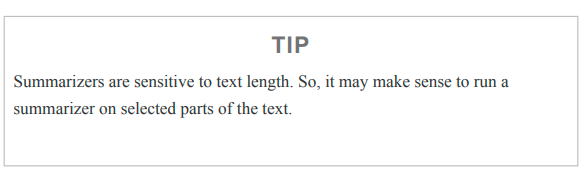

# WordCloud

In [ ]:
# !pip install wordcloud
# !pip install python-sane

In [4]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
document_file_path = ('./book.txt')
text_from_file = open(document_file_path).read()
stop_words = set(nltk.corpus.stopwords.words('english'))

In [18]:
word_tokens = word_tokenize(text_from_file)
filtered_sentence = [w for w in word_tokens if not w in
stop_words]
wl_space_split = " ".join(filtered_sentence)


In [19]:
my_wordcloud = WordCloud().generate(wl_space_split)

In [20]:
wl_space_split

"Artificial Intelligence : Transforming Future Artificial Intelligence ( AI ) one transformative technologies time . From healthcare finance , transportation entertainment , AI reshaping industries redefining interact world . This article delves evolution , applications , implications AI , exploring potential revolutionize future . The Evolution AI The concept artificial intelligence dates back ancient mythology , stories mechanical beings endowed intelligence common . However , formal inception AI scientific discipline occurred mid-20th century . In 1956 , term `` artificial intelligence '' coined Dartmouth Conference , marking birth AI research . Early AI efforts focused symbolic reasoning problem-solving , researchers building systems could perform tasks like theorem proving playing chess . The 1980s saw rise expert systems , encoded human expertise specific domains make decisions . Despite initial success , systems faced limitations handling uncertainty adapting new situations . Th

In [21]:
import matplotlib.pyplot as plt

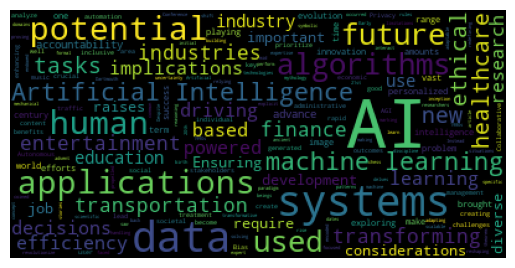

In [22]:

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()


# Tweets analysing

In [24]:
# !pip install textblob

In [43]:
from textblob import TextBlob


tweets_text_collection = [
    "I just had the best coffee of my life! ☕️😍 #blessed",
    "Feeling sad and lonely today. 😢",
    "What an amazing game last night! #GoTeam 🏀🎉",
    "Stuck in traffic for hours... so frustrating. 😡🚗",
    "Excited about my new job! Can't wait to start. 🙌",
    "I can't believe the news today. Shocked and heartbroken. 💔",
    "Just finished a great workout. Feeling fantastic! 💪😊",
    "Why is customer service so bad these days? Totally disappointed. 😠",
    "Had a lovely dinner with friends tonight. Good times. 🍽️❤️",
    "Another rainy day... when will the sun come out? ☔️😞",
    "😊😊😊😊😊😊😊😊😊😊😊😊",
    "smile face smile face smile face",
]

for tweet_text in tweets_text_collection:
    analysis = TextBlob(tweet_text)
    print(tweet_text," " * (70-len(tweet_text))+"|"+"       ",analysis.sentiment)

I just had the best coffee of my life! ☕️😍 #blessed                    |        Sentiment(polarity=1.0, subjectivity=0.3)
Feeling sad and lonely today. 😢                                        |        Sentiment(polarity=-0.3, subjectivity=0.85)
What an amazing game last night! #GoTeam 🏀🎉                            |        Sentiment(polarity=0.0666666666666667, subjectivity=0.45555555555555555)
Stuck in traffic for hours... so frustrating. 😡🚗                       |        Sentiment(polarity=-0.4, subjectivity=0.9)
Excited about my new job! Can't wait to start. 🙌                       |        Sentiment(polarity=0.2727272727272727, subjectivity=0.6022727272727273)
I can't believe the news today. Shocked and heartbroken. 💔             |        Sentiment(polarity=-0.7, subjectivity=0.8)
Just finished a great workout. Feeling fantastic! 💪😊                   |        Sentiment(polarity=0.65, subjectivity=0.825)
Why is customer service so bad these days? Totally disappointed. 😠     |      

# spell correction

In [44]:
from textblob import TextBlob
data = "His sellection is bery antresting"
output = TextBlob(data).correct()
print(output)

His selection is very interesting


In [48]:
data = "what the fwe eaxmales of tha comlex dynamcal systems"
output = TextBlob(data).correct()
print(output)

what the we examples of the complex dynamcal systems


: 

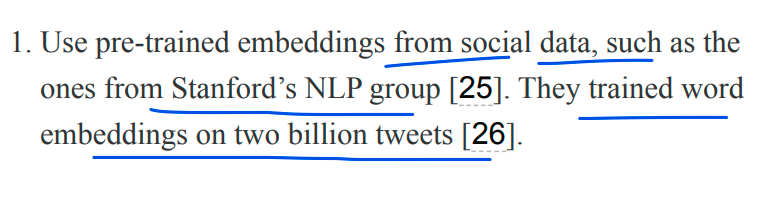

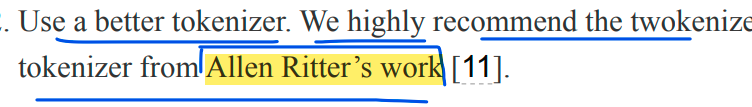

# LEXNLP

In [ ]:
pip install lexnlp


In [ ]:
import lexnlp.extract.en.amounts
import lexnlp.extract.en.entities.nltk_maxent
import lexnlp.extract.en.dates
import lexnlp.extract.en.courts
import lexnlp.extract.en.citations
import lexnlp.extract.en.percents
import lexnlp.extract.en.ratios
import lexnlp.extract.en.geoentities


text = """
On March 15, 2023, the United States District Court for the Southern District of New York ruled in the case of Johnson v. Smith. 
The court awarded $500,000 in damages to the plaintiff. The decision was based on the violation of federal statutes, specifically 28 U.S.C. § 1332.
"""

dates = list(lexnlp.extract.en.dates.get_dates(text))
print("Dates:", dates)


In [ ]:
money = list(lexnlp.extract.en.amounts.get_money(text))
print("Monetary Amounts:", money)


In [ ]:
case_names = list(lexnlp.extract.en.entities.nltk_maxent.get_case_names(text))
print("Case Names:", case_names)


In [ ]:
citations = list(lexnlp.extract.en.citations.get_citations(text))
print("Citations:", citations)


# AUTO ML

In [ ]:
!pip3 install auto-sklearn

In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X, y,
random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy", sklearn.metrics.accuracy_score(y_test,y_hat))


# YT

In [12]:
# !pip install youtube_transcript_api
# !pip install pytube

In [15]:
from pytube import YouTube

def download_youtube_video(url, output_path='.'):
    try:
        # Create a YouTube object
        yt = YouTube(url)

        # Get the highest resolution progressive stream
        stream = yt.streams.get_highest_resolution()

        # Download the video
        print(f"Downloading: {yt.title}")
        stream.download(output_path)
        print("Download completed!")
        
        return f"{output_path}/{yt.title}.mp4"
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

video_url = "https://www.youtube.com/watch?v=ZjYGlBcJtXM"
downloaded_file = download_youtube_video(video_url)

if downloaded_file:
    print(f"Video downloaded to: {downloaded_file}")

An error occurred: HTTP Error 400: Bad Request


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

def get_transcript(video_id):
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        return transcript
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
# Example usage
video_id = "ZjYGlBcJtXM"  # This is the video ID from the URL
transcript = get_transcript(video_id)

if transcript:
    # Print the full transcript
    for entry in transcript:
        # print(f"{entry['start']}: {entry['text']} : {entry['start'] + entry['start']}")
        print(f"{entry}")
    
    # Or join all text into a single string
    full_text = ' '.join([entry['text'] for entry in transcript])
    print(full_text)
else:
    print("Couldn't retrieve the transcript.")

In [16]:
from sentence_transformers import SentenceTransformer
SentenceTransformer()